In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1= pd.read_csv('/kaggle/input/fivethirtyeight-births-dataset/US_births_1994-2003_CDC_NCHS.csv')
data1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [3]:
data2= pd.read_csv('/kaggle/input/fivethirtyeight-births-dataset/US_births_2000-2014_SSA.csv')
data2.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [4]:
birth_data = pd.merge(data1,data2, how='outer')

In [5]:
birth_data.rename(columns={'date_of_month': 'day'}, inplace=True)


In [6]:
birth_data.isna().sum()

year           0
month          0
day            0
day_of_week    0
births         0
dtype: int64

In [7]:
from scipy import stats

#checking for outliers
z_scores = stats.zscore(birth_data)
outliers = np.where((z_scores >= 3) | (z_scores <= -3))
outliers



(array([], dtype=int64), array([], dtype=int64))

Looks like there are no outliers

In [8]:
#check for duplicate
birth_data.duplicated().sum()

0

No duplicates

In [9]:
from statsmodels.tsa.stattools import adfuller


#checking for stationarity 
flattened_data = birth_data.values
flat = flattened_data.flatten()
result = adfuller(flat)    
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -13.322821
p-value: 0.000000


p-value is greater than 0.5 so this data is not stationary.

In [10]:
#formating to a datetime datatype
birth_data['datetime'] = pd.to_datetime(birth_data[['year', 'month', 'day']], format='%Y-%m-%d')
birth_data.drop(['year', 'month', 'day'], axis=1, inplace=True)
birth_data 

,day_of_week,births,datetime
0,6,8096,1994-01-01
1,7,7772,1994-01-02
2,1,10142,1994-01-03
3,2,11248,1994-01-04
4,3,11053,1994-01-05
...,...,...,...
9126,6,8656,2014-12-27
9127,7,7724,2014-12-28
9128,1,12811,2014-12-29
9129,2,13634,2014-12-30


In [11]:
birth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9131 entries, 0 to 9130
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day_of_week  9131 non-null   int64         
 1   births       9131 non-null   int64         
 2   datetime     9131 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 285.3 KB


Text(0, 0.5, 'Mean births')

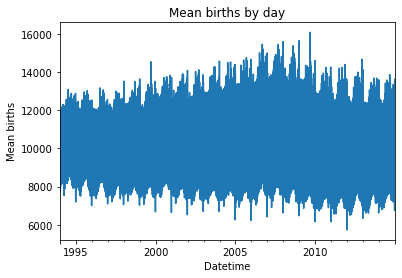

In [12]:
plot1 = birth_data.groupby('datetime')['births'].mean()
# Plot the result as a line plot
plot1.plot()
# Add a title and labels to the axes
plt.title("Mean births by day")
plt.xlabel("Datetime")
plt.ylabel("Mean births")

Text(0, 0.5, 'Mean births')

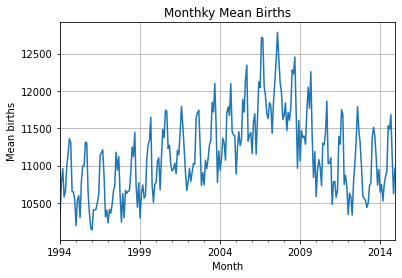

In [13]:
downsampled_data = birth_data.resample('M', on='datetime').mean()
downsampled_data.births.plot()
plt.grid()
plt.title("Monthly Mean Births")
plt.xlabel("Month")
plt.ylabel("Mean births")

We observe seasonality when downsampled to the month.

Text(0, 0.5, 'Mean births')

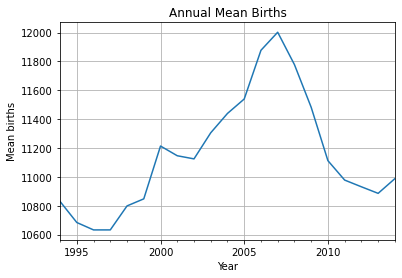

In [14]:
downsampled_data = birth_data.resample('A', on='datetime').mean()
downsampled_data.births.plot()
plt.grid()
plt.title("Annual Mean Births")
plt.xlabel("Year")
plt.ylabel("Mean births")

And we observe a trend when downsample to annual observation. 